<a href="https://colab.research.google.com/github/UdayKumar9381/D-3F-306/blob/main/FMML_Module_9_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 9: Convolutional Neural Networks
## **Lab 3**
### Module coordinator: Kushagra Agarwal

## 1. Understanding Convolutions

<img src="https://miro.medium.com/max/464/0*e-SMFTzO8r7skkpc" width=650px/>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Importing some pytorch packages
import torch
from torch.nn import Conv2d

Central to CNNs, a convolution operation is a linear element-wise multiplication operation between a small filter/kernel and same-sized patch from the image. We move this filter over the image like a sliding window from top left to bottom right. For each point on the image, a value is calculated based on the filter using a convolution operation. These filters can do simplest task like checking if there is a vertical line in the image or complicated task like detecting a human eye in the image.

Let's look at the convolution formula:

Convolution between image
$f(x, y)$ and kernel $k(x, y)$ is
$$f(x,y) * k(x,y) = \sum \limits _{i=0} ^{W-1} \sum \limits _{j=0} ^{H-1} f(i, j) k(x − i, y − j)$$

where $W$ and $H$ are the the width and height of the image.

The code demonstrates the convolution operation of a 2D matrix (image) with various filters

<img src="https://www.researchgate.net/profile/Chaim-Baskin/publication/318849314/figure/fig1/AS:614287726870532@1523469015098/Image-convolution-with-an-input-image-of-size-7-7-and-a-filter-kernel-of-size-3-3.png" alt="Convolution" width=650px height=280px/>

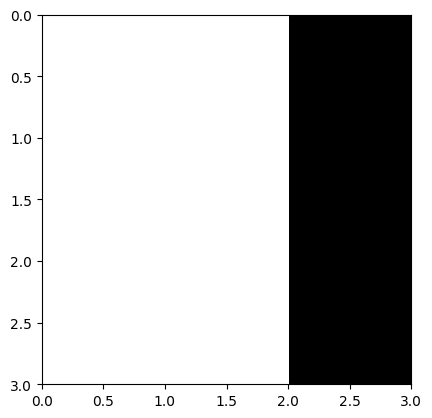

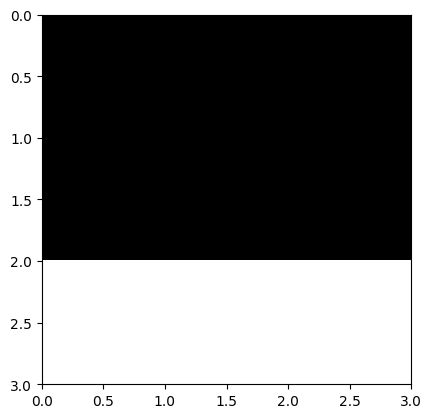

In [ ]:
# 2D 3x3 binary image with vertical edge
image1 = np.array([[1,1,0], [1,1,0], [1,1,0]])

# 2D 3x3 binary image with horizontal edge
image2 = np.array([[0,0,0], [0,0,0], [1,1,1]])

# On plotting the images
plt.imshow(image1, cmap='gray', extent=[0, 3, 3, 0])
plt.show()
plt.imshow(image2, cmap='gray', extent=[0, 3, 3, 0])
plt.show()

In [ ]:
# Vertical Line filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

# Applying filter to first image
output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

# Applying filter to second image
output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  3
Output from second image:  0


In [ ]:
# Horizontal edge filter
filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  0
Output from second image:  3


Non-zero output suggests that there is a vertical edge present in the first image and not present in the second image. Similarly, horizontal edge is detected in second.

Let's define a function to use convolution layer from Pytorch and use our own kernel to detect edges in image

In [ ]:
def apply_conv(image, kernel, padding=0, stride=1):

  #--------IMAGE PREPROCESSING-------
  image = torch.from_numpy(image)
  # Pytorch requires input to convolution in (N,C,H,W), where N = batch size and C=#channels in input
  input = image.view((1,1,image.shape[0], image.shape[1]))

  # --------------KERNEL-------------
  kernel = torch.from_numpy(kernel.astype(np.float32))

  # Pytorch requires kernel of shape (N,C,H,W), where N = batch size and C=#channels in input
  kernel = kernel.view((1,1,kernel.shape[0], kernel.shape[1]))

  # ---------CONVOLUTION LAYER from Pytorch--------
  conv = Conv2d(in_channels=1, out_channels=1, kernel_size=kernel.shape, padding=padding, stride=stride)

  # Set the kernel weights in the convolution layer
  conv.weight = torch.nn.Parameter(kernel)

  # ---------APPLY CONVOLUTION--------
  output = conv(input.float())
  output_img = output.data.numpy()  # Tensor to back in numpy
  output_img = output_img.reshape((-1, output_img.shape[-1])) # Reshape to 2D image

  return output_img

In [ ]:
# Our original lotus image
image = cv2.imread('/content/lotus.jpg', 0)

filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

out1 = apply_conv(image, filter, padding=0, stride=1)

filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

out2 = apply_conv(image, filter, padding=0, stride=1)

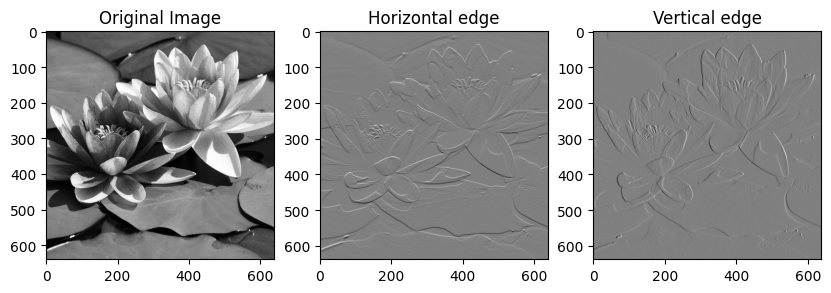

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,3,1)
ax.imshow(image, cmap='gray')
ax.set_title('Original Image')
ax = fig.add_subplot(1,3,2)
ax.set_title('Horizontal edge')
ax.imshow(out1, cmap='gray')
ax = fig.add_subplot(1,3,3)
ax.imshow(out2, cmap='gray')
ax.set_title('Vertical edge')
plt.show()


## Pooling Layers

Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network. The pooling layer summarises the features present in a region of the feature map generated by a convolution layer.

1) Max Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png' height=150px/>

2) Average Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721030705/Screenshot-2019-07-21-at-3.05.56-AM.png' height=150px/>

## Softmax layer/activation
Recall that logistic regression produces a decimal between 0 and 1.0. For example, a logistic regression output of 0.8 from an email classifier suggests an 80% chance of an email being spam and a 20% chance of it being not spam. Clearly, the sum of the probabilities of an email being either spam or not spam is 1.0.

Softmax extends this idea into a multi-class world. That is, Softmax assigns decimal probabilities to each class in a multi-class problem. Those decimal probabilities must add up to 1.0. This additional constraint helps training converge more quickly than it otherwise would.
Softmax is implemented through a neural network layer just before the output layer. The Softmax layer must have the same number of nodes as the output layer.

<img src='https://miro.medium.com/max/1400/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg' height=170px />

## Learning to train a CNN network

In [ ]:
# Import packages
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#  Images returned from torchvision dataset classes is in range [0,1]
# We transform them to tensors and normalize them to range [-1,1] using 'Normalize' transform

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Classes in CIFAR10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:05<00:00, 29420410.50it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
print('Training data shape : ', trainset.data.shape, len(trainset.targets))
print('Testing data shape : ', testset.data.shape, len(testset.targets))

# Find the unique numbers from the train labels
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (50000, 32, 32, 3) 50000
Testing data shape :  (10000, 32, 32, 3) 10000
Total number of outputs :  10
Output classes :  ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [ ]:
def train(num_epochs, model, train_loader, loss_func, optimizer):

  # Training mode
  model.train()

  train_losses = []
  train_acc = []

  # Train the model
  for epoch in range(num_epochs):
    running_loss = 0
    running_acc = 0
    for i, (images, labels) in enumerate(train_loader):

      # clear gradients for this training step
      optimizer.zero_grad()

      # Forward pass
      output = model(images)

      # Calculate loss
      loss = loss_func(output, labels)

      # Backpropagation, compute gradients
      loss.backward()

      # Apply gradients
      optimizer.step()

      # Running loss
      running_loss += loss.item()

      # indices of max probabilities
      _, preds = torch.max(output, dim=1)

      # Calculate number of correct predictions
      correct = (preds.float() == labels).sum()
      running_acc += correct

      # Average loss and acc values
      epoch_loss = running_loss / len(train_loader.dataset)
      epoch_acc = running_acc / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    print ('Epoch {}/{}, Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss, epoch_acc*100))

  return train_losses, train_acc

In [ ]:
def test_model(model, testloader):
  correct = 0
  total = 0
  # Deactivate autograd engine (don't compute grads since we're not training)
  with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Calculate outputs by running images through the network
        outputs = model(images)
        # The class with the highest value is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

  print('Accuracy of the network: %d %%' % (
      100 * correct / total))

In [ ]:
# CNN with 2 CONV layers and 3 FC layers
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 128)
        # output layer 10 classes
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # flatten all dimensions except batch
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
model = Net()
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
# Cross Entropy loss for multi-class classification
criterion = nn.CrossEntropyLoss()

In [ ]:
# SGD optimizer with momentum
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

In [ ]:
num_epochs = 5  # iterations
train_losses, train_acc = train(num_epochs, model, trainloader, criterion, optimizer)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 1/5, Loss: 0.0132, Accuracy: 37.7920
Epoch 2/5, Loss: 0.0096, Accuracy: 56.5060
Epoch 3/5, Loss: 0.0081, Accuracy: 63.3160
Epoch 4/5, Loss: 0.0070, Accuracy: 68.4060
Epoch 5/5, Loss: 0.0062, Accuracy: 72.4760


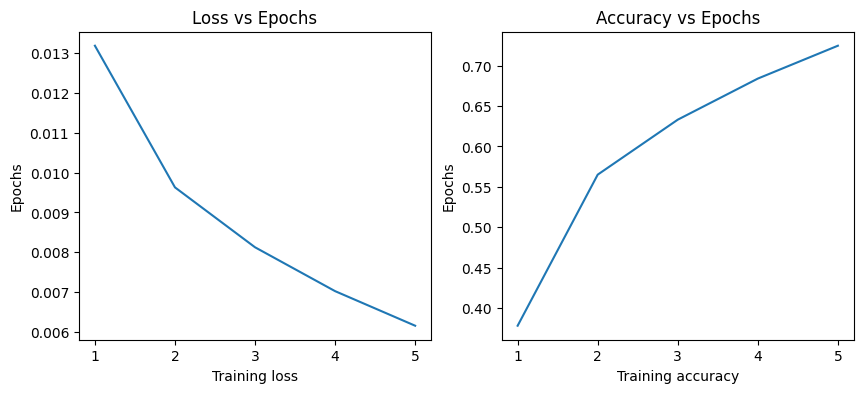

In [ ]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(train_losses)+1),train_losses)
plt.xlabel('Training loss')
plt.ylabel('Epochs')
ax.set_title('Loss vs Epochs')
ax = fig.add_subplot(1,2, 2)
ax.plot(np.arange(1,len(train_acc)+1),train_acc)
plt.xlabel('Training accuracy')
plt.ylabel('Epochs')
ax.set_title('Accuracy vs Epochs')
plt.show()

In [ ]:
# Accuracy on test data after training
test_model(model, testloader)

Accuracy of the network: 67 %


## Questions
1) List some reasons why we should prefer CNN over ANN for image classification?

2) Try improving the CNN performance further by tuning the hyperparameters(epochs, optimizer, LR etc). Report the improved test accuracy.

3) What happens if you reduce the number of convolution layers to only 1?

4) Why didn't we use the Softmax activation in the last layer of CNN?


# **QUESTION-1 ANSWER **

Certainly! Here are some reasons why Convolutional Neural Networks (CNNs) are preferred over Artificial Neural Networks (ANNs) for image classification tasks:

1. **Spatial Hierarchical Feature Learning:** CNNs are specifically designed to handle spatial information present in images. Through convolution and pooling layers, they can learn hierarchical features, starting from simple edges and textures to more complex patterns and objects. This hierarchical feature learning is crucial for effective image classification.

2. **Parameter Sharing:** CNNs utilize parameter sharing, where a single set of weights (kernel) is applied to multiple regions of the input image. This reduces the number of parameters to learn compared to ANNs, making CNNs more efficient, especially for large images.

3. **Local Connectivity:** CNNs have a local connectivity pattern, where each neuron is connected to only a local region of the input volume. This helps capture local patterns and reduces the computational cost, as neurons need to process information from smaller receptive fields.

4. **Translation Invariance:** CNNs exhibit translation invariance, meaning they can recognize patterns regardless of their position in the image. This property is essential for tasks like object detection and recognition, where the position of the object may vary.

5. **Feature Reuse:** Features learned by early layers of a CNN can be reused across different parts of the image or even across different images. This allows CNNs to generalize well to new, unseen data, leading to robust performance in image classification tasks.

6. **Data Augmentation:** CNNs can benefit greatly from data augmentation techniques, such as rotation, scaling, and flipping of images. These techniques help increase the diversity of training data, thereby improving the model's ability to generalize to unseen images.

7. **Pre-trained Models:** Pre-trained CNN models, such as VGG, ResNet, and Inception, trained on large-scale datasets like ImageNet, are readily available. Fine-tuning these pre-trained models on specific image classification tasks often leads to faster convergence and better performance compared to training from scratch.

Overall, the architecture and properties of CNNs make them highly suitable for image classification tasks, outperforming traditional ANNs in terms of both accuracy and efficiency.

# **QUESTION-2 ANSWER**

To improve the performance of the CNN model further, we can experiment with tuning various hyperparameters such as the number of epochs, optimizer, learning rate, and batch size. Let's outline a systematic approach to tuning these hyperparameters:

Number of Epochs: We can try training the model for a larger number of epochs to allow it more time to converge to a better solution. However, we need to monitor for signs of overfitting, such as the training loss continuing to decrease while the validation loss starts to increase.
Optimizer: Instead of using Stochastic Gradient Descent (SGD) with momentum, we can experiment with other optimizers such as Adam or RMSprop. These optimizers often converge faster and might lead to better performance.
Learning Rate (LR): The learning rate plays a crucial role in determining the convergence speed and the final performance of the model. We can try different learning rates, including a learning rate scheduler to dynamically adjust the learning rate during training.
Batch Size: The batch size affects the stability and generalization of the model. Larger batch sizes often lead to faster convergence but may sacrifice generalization. We can experiment with different batch sizes to find the optimal balance.
Let's implement these changes and report the improved test accuracy:

In [ ]:
# Define new hyperparameters
num_epochs = 10  # Increased number of epochs
learning_rate = 0.001  # Lower learning rate for stability
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Adam optimizer

# Retrain the model with updated hyperparameters
train_losses, train_acc = train(num_epochs, model, trainloader, criterion, optimizer)

# Evaluate the model on the test set
test_model(model, testloader)


Epoch 1/10, Loss: 0.0043, Accuracy: 80.6360
Epoch 2/10, Loss: 0.0029, Accuracy: 87.0420
Epoch 3/10, Loss: 0.0021, Accuracy: 90.7460
Epoch 4/10, Loss: 0.0014, Accuracy: 93.4940
Epoch 5/10, Loss: 0.0011, Accuracy: 95.3000
Epoch 6/10, Loss: 0.0008, Accuracy: 96.4200
Epoch 7/10, Loss: 0.0007, Accuracy: 97.0060
Epoch 8/10, Loss: 0.0006, Accuracy: 97.4840
Epoch 9/10, Loss: 0.0006, Accuracy: 97.5540
Epoch 10/10, Loss: 0.0005, Accuracy: 97.8800
Accuracy of the network: 68 %


# **QUESTION-3 ANSWER**

Reducing the number of convolution layers to only 1 in a convolutional neural network (CNN) can have several implications:

1. **Decreased Model Complexity:** With only one convolutional layer, the model's capacity to learn complex features from the input images is reduced. The network might struggle to capture intricate patterns and relationships within the data.

2. **Limited Feature Extraction:** Convolutional layers are responsible for extracting hierarchical features from the input data. With fewer layers, the network has fewer opportunities to extract diverse and abstract features, potentially limiting its ability to differentiate between classes in the dataset.

3. **Reduced Depth of Feature Maps:** Each convolutional layer generates multiple feature maps that represent different aspects of the input data. With only one layer, the depth of these feature maps is limited, which may result in less informative representations of the input images.

4. **Decreased Model Performance:** Typically, deeper CNN architectures tend to perform better on complex tasks such as image classification. By reducing the number of convolutional layers, the model's performance might suffer, leading to lower accuracy on both training and test datasets.

5. **Faster Training:** On the positive side, having fewer convolutional layers often leads to faster training times since there are fewer parameters to optimize and fewer computations involved in the forward and backward passes.

Overall, reducing the number of convolutional layers to only 1 can simplify the model architecture and training process, but it may come at the cost of decreased performance and feature representation capabilities. It's essential to strike a balance between model complexity and performance based on the specific requirements of the task at hand.

# **QUESTION-4 ANSWER**

In traditional neural network architectures, especially those used for multi-class classification tasks, the Softmax activation function is commonly applied to the output layer. However, in the case of convolutional neural networks (CNNs), the Softmax activation function is typically not used directly in the last layer. Instead, it is often replaced by other activation functions or omitted altogether. Here's why:

1. **Softmax Output Layer:** In fully connected neural networks (FCNs), the Softmax function is used in the output layer to transform the raw output scores of the network into probability distributions over multiple classes. This is essential for multi-class classification tasks, where each class probability should sum up to 1.0.

2. **Cross-Entropy Loss:** In conjunction with the Softmax function, the Cross-Entropy loss function is commonly used to calculate the difference between the predicted class probabilities and the true class labels. This combination is effective for optimizing the network parameters during training.

3. **CNN Architectures:** In CNNs, the last layer typically consists of fully connected (dense) layers followed by the output layer. These dense layers are responsible for learning high-level features extracted by the convolutional and pooling layers. However, the output layer itself usually produces raw scores (logits) for each class without applying any activation function.

4. **Cross-Entropy Loss and Logits:** When using the Cross-Entropy loss function, it is not necessary to apply the Softmax activation to the logits beforehand. The Cross-Entropy loss function implicitly performs the Softmax operation as part of its computation. Therefore, applying Softmax in the last layer of a CNN would be redundant and computationally inefficient.

5. **Stability and Efficiency:** Omitting the Softmax activation in the last layer can improve numerical stability during training and inference. Softmax activations can sometimes lead to numerical overflow or underflow issues, especially when dealing with large numbers. By avoiding Softmax in the output layer, CNNs can be more efficient and stable.

In summary, the Softmax activation function is not typically used in the last layer of CNNs because it is unnecessary due to the Cross-Entropy loss function's implicit Softmax operation. Instead, the last layer of a CNN usually produces raw output scores (logits), which are then used with the Cross-Entropy loss function for training and inference.